Optimal parameters are a=2.56091, b=1.31557, and c=0.455826


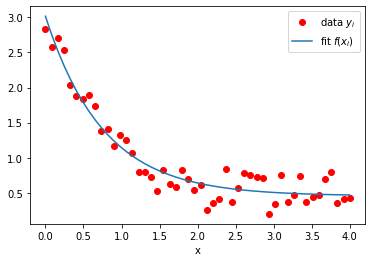

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def f(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a * np.exp(- b * x) + c

#create fake data
x = np.linspace(0, 4, 50)
y = f(x, a=2.5, b=1.3, c=0.5)
#add noise
yi = y + 0.2 * np.random.normal(size=len(x))

#call curve fit function
popt, pcov = curve_fit(f, x, yi)
a, b, c = popt
print("Optimal parameters are a=%g, b=%g, and c=%g" % (a, b, c))

#plotting
yfitted = f(x, *popt)   # equivalent to f(x, popt[0], popt[1], popt[2])

#plt.plot(x,y,'b-')
plt.plot(x, yi, 'ro', label='data $y_i$')
plt.plot(x, yfitted, '-', label='fit $f(x_i)$')
plt.xlabel('x')
plt.legend()

In [ ]:
print(len(popt))
print(popt)

3
[2.56090939 1.31556927 0.45582585]


True parameters:  [1, 0.3, 0.7, 2, 3, 4]
Predicted params: [1.  0.3 0.7 2.  3.  4. ]
Residual, RMS(obs - pred): 4.406789489629001e-17


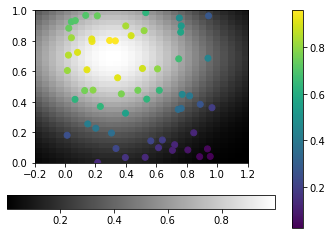

In [ ]:
import scipy.optimize as sc_opt

def Gauss2d(xy, amp, x0, y0, a, b, c):
    x, y = xy
    inner = a * (x - x0)**2
    inner += 2 * b * (x - x0)**2 * (y - y0)**2
    inner += c * (y - y0)**2
    return amp * np.exp(-inner)

def GenerateNoisyData(num, params):
    np.random.seed(1977) # For consistency
    xy = np.random.random((2, num))

    zobs = Gauss2d(xy, *params)
    return xy, zobs

def Gauss2DPlot(xy, zobs, pred_params):
    x, y = xy
    plt.scatter(x, y, c=zobs)
    plt.colorbar()
    yi = np.linspace(0.0,1.0,30)
    xi = np.linspace(-0.2,1.2,30)
    X, Y = np.meshgrid(xi, yi)
    xyi = np.vstack([X.ravel(), Y.ravel()])
    zpred = Gauss2d(xyi, *pred_params)
    zp2D = zpred.reshape(X.shape)
    im2 = plt.imshow(zp2D, origin='image', extent=[xi.min(), xi.max(), yi.min(), yi.max()]
              ,cmap=plt.cm.gray)
    plt.colorbar(im2, orientation='horizontal')
    plt.savefig('gauss2d_plot.pdf')


## Main program starts here

np.random.seed(1985)
x0, y0 = 0.3, 0.7
amp, a, b, c = 1, 2, 3, 4
true_params = [amp, x0, y0, a, b, c]
xy, zobs = GenerateNoisyData(60, true_params)    # Thats the data. 
x, y = xy

i = zobs.argmax()       # Index in the array where zobs is max. 

guess = [1, x[i], y[i], 1, 1, 0]
pred_params, uncert_cov = sc_opt.curve_fit(Gauss2d, xy, zobs, p0=guess)

zpred = Gauss2d(xy, *pred_params)               # Predicted value.
print('True parameters: ', true_params)
print('Predicted params:', pred_params)
print('Residual, RMS(obs - pred):', np.sqrt(np.mean((zobs - zpred)**2)))

Gauss2DPlot(xy, zobs, pred_params)

In [ ]:
a=2
print(a)
a+=4
print(a)
a+=4
print(a)
print(zobs.shape)

2
6
10
(60,)


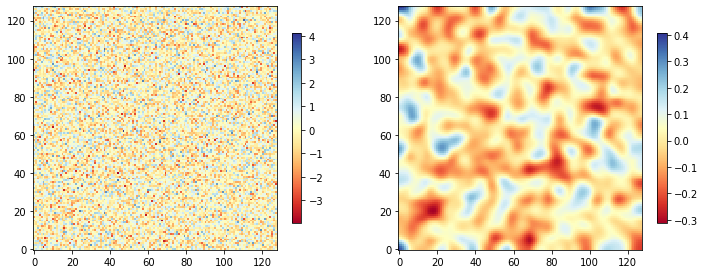

In [ ]:
import scipy.ndimage as sc_ndimg
np.random.seed(1289)
img = np.random.randn(128,128)

f1 = plt.figure(figsize=[12,5])
ax1 = plt.subplot(121)
im1 = ax1.imshow(img, origin='image',cmap=plt.get_cmap('RdYlBu'))
plt.colorbar(im1, shrink=0.7)

ax2 = plt.subplot(122)
img_g = sc_ndimg.filters.gaussian_filter(img,sigma=3.0)
im2 = ax2.imshow(img_g, origin='image',cmap=plt.get_cmap('RdYlBu'))
plt.colorbar(im2,shrink=0.7)
plt.savefig('test.png')

In [ ]:
import pandas as pd

In [ ]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('data/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.tail()


,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [ ]:
data.shape

(200, 4)

In [ ]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


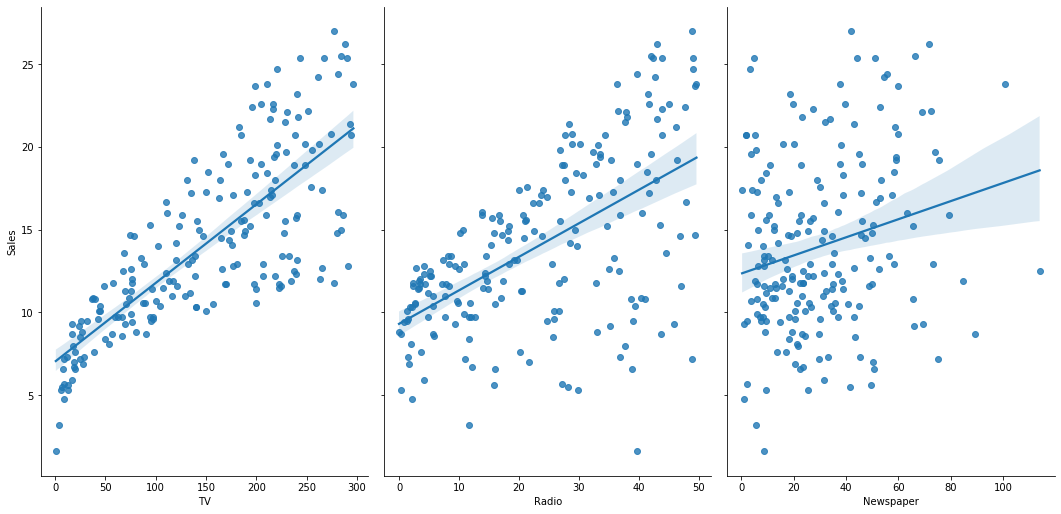

In [ ]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [ ]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()
print(X.shape)

(200, 3)


In [ ]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

#print(type(y))

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [ ]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(150, 3)
(150,)
(50, 3)
(50,)


In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.003450464711180378)]

In [ ]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [ ]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


In [ ]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886
